# Latar Belakang

### Industri SaaS Sales telah menjadi salah satu sektor yang berkembang pesat dalam ekonomi digital modern, namun dengan pertumbuhan yang pesat juga datang tantangan yang kompleks. Dalam upaya untuk tetap kompetitif dan menghasilkan pertumbuhan yang berkelanjutan, perusahaan SaaS Sales harus memahami dengan baik karakteristik pelanggan mereka serta dinamika pasar yang terus berubah. Salah satu aspek penting yang perlu dipertimbangkan adalah tingkat keloyalan pelanggan dan pola pembelian dari masing-masing segmen pelanggan seiring waktu. Selain itu, dampak dari peristiwa global seperti pandemi Covid-19 juga memainkan peran krusial dalam mengubah perilaku konsumen dan tren penjualan. Oleh karena itu, evaluasi tren penjualan selama periode pandemi menjadi kunci dalam mengadaptasi strategi pemasaran perusahaan.

# Stakeholder

#### Stakeholder dalam penelitian ini meliputi manajemen perusahaan. Mereka memiliki kepentingan dalam memahami kinerja penjualan SaaS, strategi penjualan, analisis keuangan, dan ekstraksi wawasan data untuk pengambilan keputusan yang lebih baik dalam mengelola operasi penjualan.

# Rumasan Masalah
### 1. Pelanggan Saas Sales memiliki karakteristik yang bervariasi. Untuk meningkatkan efisiensi strategi pemasaran, Bagaimana memahami karakteristik pelanggan serta tingkat keloyalan mereka dalam konteks penjualan perangkat lunak sebagai layanan (SaaS Sales), sambil mengidentifikasi pola pembelian dari masing-masing segmen pelanggan seiring waktu?
### 2. Pada periode Maret-November 2020 dan Juli-Desember 2021, terjadi wabah pandemi Covid-19. Sehingga, penting untuk mengevaluasi tren penjualan pelanggan SAAS Sales dari tahun 2020 hingga 2023 dan menentukan apakah pandemi Covid-19 memiliki pengaruh terhadap tren penjualan pelanggan SAAS Sales selama periode tersebut.

# Goals
### 1. Meningkatkan efisiensi strategi pemasaran SaaS Sales dengan memahami karakteristik pelanggan, tingkat keloyalan, dan pola pembelian seiring waktu. Dengan menganalisis perilaku pembelian dan preferensi produk, strategi pemasaran dapat dioptimalkan untuk memenuhi kebutuhan pelanggan yang beragam, meningkatkan retensi pelanggan, dan mengoptimalkan penjualan. 
### 2. Mengevaluasi tren penjualan pelanggan SAAS Sales dari tahun 2020 hingga 2023, lebih tepatnya pada bulan Maret-Mei 2020 dan Juli-Desember 2021 dan menentukan dampak pandemi Covid-19 terhadap tren penjualan. Ini bertujuan untuk memahami pola pembelian pelanggan serta mengidentifikasi perubahan yang terjadi selama periode pandemi, sehingga memungkinkan penyusunan strategi yang responsif dan efektif.


In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from scipy.stats import kstest # type: ignore
from scipy.stats import shapiro
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
import datetime as dt
import folium # type: ignore
from folium.plugins import HeatMap, MarkerCluster # type: ignore
# import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
c:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this 

# Data Understanding

### Menampilkan Dataset

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Dataset ini terdiri dari 19 kolom, yaitu:
| No. | Column Name    | Description                                                |
|----|----------------|------------------------------------------------------------|
| 1  | Row ID         | Identifikasi unik untuk setiap transaksi.                  |
| 2  | Order ID       | Identifikasi unik untuk setiap pesanan.                    |
| 3  | Order Date     | Tanggal ketika pesanan ditempatkan.                         |
| 4  | Date Key       | Representasi numerik dari tanggal pesanan (YYYYMMDD).       |
| 5  | Contact Name   | Nama orang yang menempatkan pesanan.                       |
| 6  | Country        | Negara tempat pesanan ditempatkan.                         |
| 7  | City           | Kota tempat pesanan ditempatkan.                            |
| 8  | Region         | Wilayah tempat pesanan ditempatkan.                         |
| 9  | Subregion      | Subwilayah tempat pesanan ditempatkan.                      |
| 10 | Customer       | Nama perusahaan yang menempatkan pesanan.                  |
| 11 | Customer ID    | Identifikasi unik untuk setiap pelanggan.                   |
| 12 | Industry       | Industri yang dimiliki oleh pelanggan.                      |
| 13 | Segment        | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).       |
| 14 | Product        | Produk yang dipesan.                                       |
| 15 | License        | Kunci lisensi untuk produk.                                |
| 16 | Sales          | Jumlah penjualan total untuk transaksi.                    |
| 17 | Quantity       | Jumlah total barang dalam transaksi.                       |
| 18 | Discount       | Diskon yang diterapkan pada transaksi.                     |
| 19 | Profit         | Keuntungan dari transaksi.                                  |

### Informasi Data Type

In [3]:
print(f'Jumlah baris dan kolom pada dataset Saas Sales adalah {df.shape}')
df.info()

Jumlah baris dan kolom pada dataset Saas Sales adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discou

Dari output tersebut, kita bisa mengetahui bahwa dataset SaaS-Sales memiliki 9994 baris dan 19 kolom. Setiap kolom memiliki tipe data yang berbeda-beda, yang antaranya terdiri dari:

`Float`: Sales, Discount, dan Profit

`int`: Row ID, Date Key, Customer ID, dan Quantity

`object`: Order ID, Order Date, Contact Name, Country, City, Region, Subregion, Customer, Industry, Segment, Product, dan License

Dari informasi yang diberikan, terlihat bahwa kolom `Order Date` memiliki tipe data yang salah atau tidak sesuai dengan data yang sebenarnya. Hal ini menunjukkan bahwa perlu dilakukan perubahan tipe data pada tahap data cleaning.

Dari semua nama kolom, ada satu nama kolom yang tipe data nya masih belum sesuai, yaitu `Order Date` seharusnya bertipe data `datetime`, sehingga perlu dilakukan perubahan tipe data yang akan diproses pada tahapan *data cleaning*. Dan juga, informasi di atas sudah cukup menjelaskan bahwa dataset Saas Sales tidak memiliki *missing values* pada setiap kolomnya, lebih detailnya akan dibahas pada tahapan *Data Cleaing & Preparation*.

# Descriptive Statistic
Berikut adalah ringkasan menyeluruh tentang dataset SaaS-Sales tanpa melakukan pengujian hipotesis. Proses ini membantu kita untuk secara jelas menyajikan data dan membuat kesimpulan awal tentang karakteristik data yang diamati, baik pada kolom kategorikal maupun numerikal.

## Numerik

In [4]:
numerik = df.select_dtypes(include='number').drop(columns=['Row ID', 'Date Key','Customer ID'])

In [5]:
numerik.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
numerik.nunique()

Sales       5825
Quantity      14
Discount      12
Profit      7287
dtype: int64

Dari data diatas, dapat kita simpulkan bahwa:
1. Kolom Sales memiliki mean 229.85, median 54.5, dan rentang nilai 0.44 - 22638.48.
2. Kolom Quantity memiliki mean 3.7, median 3 dan memiliki rentang nilai 1 - 14.
3. Kolom Discout memiliki mean 0.15, median 0,2 dan memiliki rentang nilai 0 - 0.8.
4. Kolom Profit memiliki mean 28.6, median 8.6 dan memiliki rentang nilai yaitu -6599.9 - 8399.9

# Distribusi Data

### Uji Normalitas Data

In [7]:
# Lakukan uji Shapiro-Wilk untuk data
statistic, p_value = shapiro(numerik)

# Interpretasi hasil uji
alpha = 0.05
if p_value > alpha:
    print("Tidak cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Hipotesis nol ditolak (data tidak terdistribusi normal)")

Hipotesis nol ditolak (data tidak terdistribusi normal)


### Outliers

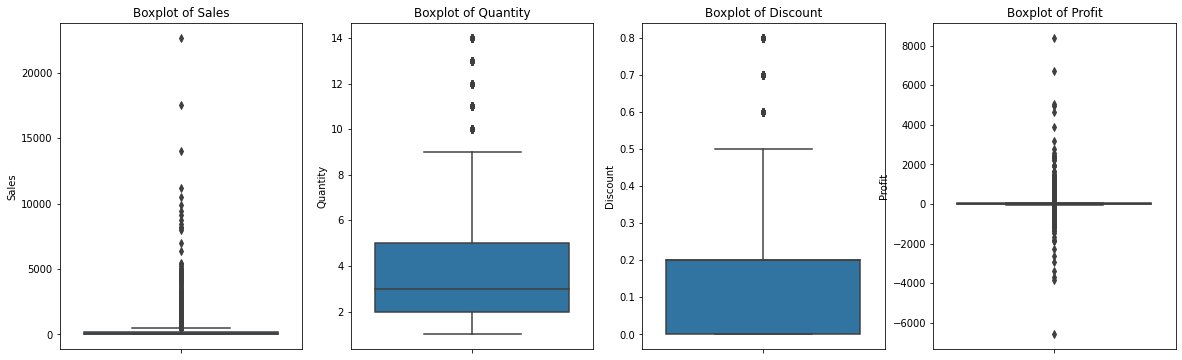

In [8]:
# Membuat subplots untuk setiap kolom
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Boxplot untuk kolom Sales
sns.boxplot(y='Sales', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Sales')

# Boxplot untuk kolom Quantity
sns.boxplot(y='Quantity', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Quantity')

# Boxplot untuk kolom Discount
sns.boxplot(y='Discount', data=df, ax=axes[2])
axes[2].set_title('Boxplot of Discount')

# Boxplot untuk kolom Profit
sns.boxplot(y='Profit', data=df, ax=axes[3])
axes[3].set_title('Boxplot of Profit')

plt.show()


In [9]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"Data {kolom} memiliki outliers {jumlah_outliers}")

Data Sales memiliki outliers 1167
Data Quantity memiliki outliers 170
Data Discount memiliki outliers 856
Data Profit memiliki outliers 1881


# Korelasi
Menghitung korelasi antar data numerik, dengan menggunakan method spearman: `data tidak normal`


In [10]:
numerik.corr(method='spearman') 

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327426,-0.056969,0.518407
Quantity,0.327426,1.000000,-0.000878,0.234491
Discount,-0.056969,-0.000878,1.000000,-0.543350
Profit,0.518407,0.234491,-0.543350,1.000000


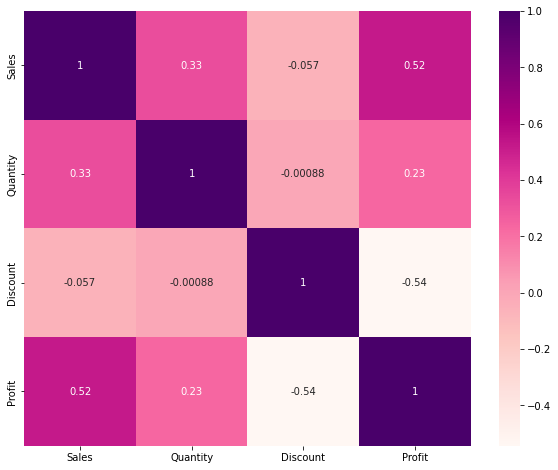

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(numerik.corr(method='spearman'), annot=True,cmap='RdPu')
plt.show()

Berdasarkan Heatmap diatas, dapat kita simpulkan bahwa `Discount` dan `Profit` memiliki korelasi yang negatif, yang artinya semakin tinggi Discount yang diberikan, maka semakin kecil `Profit` yang dihasilkan, sedangkan `Sales` dan `Profit` memiliki korelasi yang positif yang artinya semakin tinggi `Sales` maka semakin tinggi `Profit` yang dihasilkan

# Unique Values

In [16]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Name,Number of Unique Value,Unique Value Description
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Dari Unique Values diatas, kita bisa menarik kesimpulan bahwa:
- Kolom `Row ID`, `Order ID`, dan `Customer ID` berisi nomor unik untuk setiap baris, setiap pesanan, dan setiap pelanggan.
- Kolom `Date Key` hampir sama dengan kolom `Order Date`.
- Kolom `Contact Name` berisi nama orang yang melakukan transaksi untuk perusahaan.
- Kolom `License` memiliki nilai unik yang sama dengan jumlah total data pada dataset.
- Kolom `Subregion` mirip dengan kolom `Region` karena keduanya berisi informasi tentang daerah bisnis.

# Data Cleaning & Preparation
Tahap ini bertujuan untuk mengidentifikasi dan memperbaiki atau menghapus data yang anomali dari dataset. Anomali tersebut dapat berupa data yang tidak konsisten, tidak akurat, duplikat, salah format, atau hal lain yang dapat mengganggu proses analisis, seperti kolom-kolom yang tidak relevan untuk dianalisis. Setiap tindakan yang diambil untuk menangani anomali akan didasarkan pada pengetahuan domain atau analisis statistik, dan akan disertai dengan justifikasi untuk langkah-langkah yang diambil.

#### Kode df_clean = df.copy() membuat salinan independen dari DataFrame df. Dengan salinan ini, kita dapat melakukan manipulasi data tanpa mempengaruhi DataFrame asli, menjaga integritas data saat melakukan eksperimen atau analisis tambahan.

In [17]:
df_clean = df.copy()

## 1. Changing Data Type
Seperti yang sudah kita ketahui pada tahapan Data Understanding, kolom Order Date memiliki tipe data yang tidak sesuai dengan data yang dimiliki oleh kolom tersebut, sehingga kita perlu mengubahnya.

In [18]:
df_clean["Order Date"] = df_clean["Order Date"].apply(pd.to_datetime)
tipe_data_order_date = df_clean["Order Date"].dtypes

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

## 2. Missing Values

In [19]:
df_clean.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

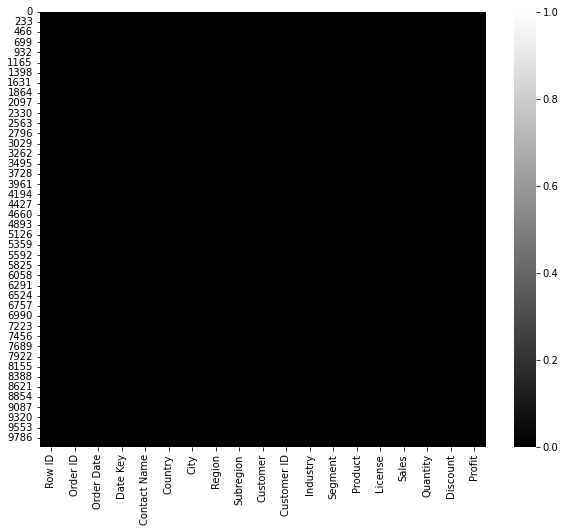

In [20]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df_clean.isnull(), vmin = 0, vmax = 1, cmap = "gray")
plt.show()

Secara umum, *dataset* SaaS-Sales tidak memiliki *missing values* di setiap kolomnya, sehingga tidak perlu melakukan penanganan *missing values*. Ini terlihat jelas ketika nilai 0 (nol) muncul di setiap kolom dalam output dan *heatmap* menunjukkan keseluruhan area berwarna hitam tanpa adanya garis putih yang menandakan keberadaan *missing values*.

### Disini saya menghapus kolom yang semua datanya berisi unique value, yaitu kolom Row ID dan License. Tujuan saya menghapus kolom tersebut supaya bisa terlihat baris-baris yang duplicate.

In [21]:
df_clean.drop(['Row ID', 'License'], axis=1, inplace=True)
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


In [22]:
duplicate_rows = df_clean[df_clean.duplicated()]
display(df_clean[df_clean.duplicated()])
duplicate_rows_count = len(duplicate_rows)
print(f' jumlah baris duplikat pada Dataset Saas Sales sebanyak {duplicate_rows_count} baris')

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
3406,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


 jumlah baris duplikat pada Dataset Saas Sales sebanyak 1 baris


In [23]:
df_clean[df_clean['Date Key'] == 20200423]

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
1448,EMEA-2020-112564,2020-04-23,20200423,Victor Walsh,France,Paris,EMEA,EU-WEST,Allianz,1080,Finance,Strategic,ContactMatcher,2.502,3,0.7,-1.7514
3405,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3407,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,ContactMatcher,7.488,8,0.7,-5.2416
3408,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,SaaS Connector Pack,22.336,4,0.2,7.8176
9289,AMER-2020-111857,2020-04-23,20200423,Boris Underwood,United States,Los Angeles,AMER,NAMER,Itochu,1032,Finance,Enterprise,Support,48.910,1,0.0,22.9877


In [24]:
# Menghapus baris-baris yang diduplikasi dari DataFrame df_clean2
df_clean.drop_duplicates(inplace=True)


In [25]:
duplicate_rows = df_clean[df_clean.duplicated()]
display(df_clean[df_clean.duplicated()])
duplicate_rows_count = len(duplicate_rows)
print(f' jumlah baris duplikat pada Dataset Saas Sales sebanyak {duplicate_rows_count} baris')

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit


 jumlah baris duplikat pada Dataset Saas Sales sebanyak 0 baris


## Handling Outlier

In [26]:
def cek_outliers(kolom, df_clean):
  q1 = numerik[[kolom]].describe().loc['25%'][0]
  q3 = numerik[[kolom]].describe().loc['75%'][0]
  iqr = q3 - q1
  whisker = 1.5 * iqr
  upper_bound = float(q3 + whisker)
  lower_bound = float(q1 - whisker)
  display(df_clean[(df_clean[kolom] > upper_bound) | (df_clean[kolom] < lower_bound)].sort_values(kolom))

In [27]:
cek_outliers('Profit', df_clean)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
7772,AMER-2022-108196,2022-11-26,20221126,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,4499.985,5,0.7,-6599.9780
683,EMEA-2023-168116,2023-11-05,20231105,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,7999.980,4,0.5,-3839.9904
9774,APJ-2020-169019,2020-07-26,20200726,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,2177.584,8,0.8,-3701.8928
3011,EMEA-2023-134845,2023-04-18,20230418,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,2549.985,5,0.7,-3399.9800
4991,APJ-2023-122714,2023-12-08,20231208,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,EMEA-2020-116904,2020-09-23,20200923,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,1029,Healthcare,SMB,ContactMatcher,9449.950,5,0.0,4630.4755
9039,AMER-2022-117121,2022-12-18,20221218,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,1093,Energy,SMB,ContactMatcher,9892.740,13,0.0,4946.3700
4190,APJ-2023-166709,2023-11-18,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,10499.970,3,0.0,5039.9856
8153,AMER-2023-140151,2023-03-24,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,13999.960,4,0.0,6719.9808


Berdasarkan data table di atas, batas bawah dari kolom `Profit` adalah -6599.97, apabila dicermati lebih lanjut nilai Profit tersebut bernilai negatif disebabkan oleh nilai pada kolom `Discount` yang tinggi sebesar 70% dan pada batas atas dari kolom `Profit` adalah 8399.97, Profit tinggi tersebut dapat dicapai ketika Discount yang diberikan 0%. Sehingga tidak perlu dilakukan handling outliers pada kolom `Profit` karna outliers tersebut masih dikatakan wajar, dan dapat disimpulkan bahwa tidak ada anomali data. 

In [28]:
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


# EDA (Exploratory Data Analysis)

## 1. Pelanggan Saas Sales memiliki karakteristik yang bervariasi. Untuk meningkatkan efisiensi strategi pemasaran, penting untuk memahami karakteristik pelanggan serta tingkat keloyalan mereka, sambil melihat pola pembelian dari masing-masing segmen seiring waktu dan mengidentifikasi produk atau layanan yang paling diminati oleh setiap segmen.

#### Menghitung RFM


,Customer,RFM_Score,Customer_segment
0,AT&T,69.40,Medium Value Customers
1,Abbott Laboratories,21.56,Low Value Customers
2,Aetna,70.01,Medium Value Customers
3,Airbus,69.40,Medium Value Customers
4,Allianz,95.74,High Value Customers


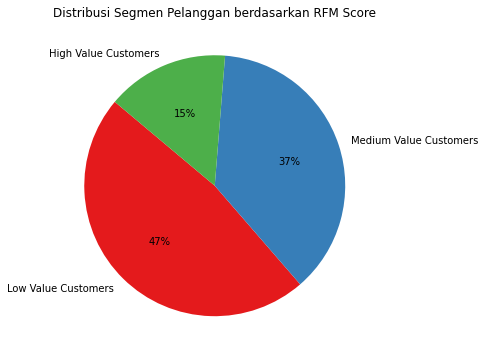

In [46]:
# Menghitung Recency
df_recency = df_clean.groupby(by='Customer', as_index=False)['Order Date'].max()
df_recency.columns = ['Customer', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

# Menghitung Frequency
frequency_df = df_clean.drop_duplicates().groupby(by=['Customer'], as_index=False)['Order Date'].count()
frequency_df.columns = ['Customer', 'Frequency']

# Menghitung Monetary
df_clean['Total'] = df_clean['Sales'] * df_clean['Quantity']
monetary_df = df_clean.groupby(by='Customer', as_index=False)['Total'].sum()
monetary_df.columns = ['Customer', 'Monetary']

# Menggabungkan Recency, Frequency, dan Monetary
rf_df = df_recency.merge(frequency_df, on='Customer')
rfm_df = rf_df.merge(monetary_df, on='Customer').drop(columns='LastPurchaseDate')

# Memberikan peringkat pelanggan berdasarkan RFM
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# Menghitung RFM_Score
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank'] + 0.28 * rfm_df['F_rank'] + 0.57 * rfm_df['M_rank']
rfm_df = rfm_df.round(2)

# Menentukan segmen pelanggan berdasarkan RFM_Score dengan tiga segmen
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 80, "High Value Customers",
                                      np.where(rfm_df['RFM_Score'] > 50, "Medium Value Customers",
                                               "Low Value Customers"))
# rfm_df.sort_values(by='M_rank',ascending=True).head(99)

# Menampilkan beberapa baris hasil
display(rfm_df[['Customer', 'RFM_Score', 'Customer_segment']].head(5))

# Visualisasi Pie Chart untuk distribusi segmen pelanggan
plt.figure(figsize=(10, 6))
plt.pie(rfm_df['Customer_segment'].value_counts(),
        labels=rfm_df['Customer_segment'].value_counts().index,
        autopct='%.0f%%',
        startangle=140,
        colors=sns.color_palette("Set1"))
plt.title('Distribusi Segmen Pelanggan berdasarkan RFM Score')
plt.show()


In [30]:
# Menggabungkan data frame df_clean dengan rfm_df berdasarkan kolom Customer
df_clean=pd.merge(df_clean,rfm_df,how='left',on='Customer')
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Profit,Total,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Customer_segment
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,41.9136,523.9200,4,151,148001.29,76.5,90.5,77.0,80.70,High Value Customers
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,219.5820,2195.8200,4,151,148001.29,76.5,90.5,77.0,80.70,High Value Customers
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,...,6.8714,29.2400,12,86,130184.23,46.5,35.5,66.0,54.54,Medium Value Customers
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,-383.0310,4787.8875,2,108,121989.05,84.5,61.0,60.0,63.96,Medium Value Customers
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,2.5164,44.7360,2,108,121989.05,84.5,61.0,60.0,63.96,Medium Value Customers


In [31]:
# Membuat kolom Profit All untuk menghitung total keuntungan
df_clean['Profit All']=df_clean['Profit']*df_clean['Quantity']
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Total,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Customer_segment,Profit All
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,523.9200,4,151,148001.29,76.5,90.5,77.0,80.70,High Value Customers,83.8272
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,2195.8200,4,151,148001.29,76.5,90.5,77.0,80.70,High Value Customers,658.7460
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,...,29.2400,12,86,130184.23,46.5,35.5,66.0,54.54,Medium Value Customers,13.7428
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,4787.8875,2,108,121989.05,84.5,61.0,60.0,63.96,Medium Value Customers,-1915.1550
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,44.7360,2,108,121989.05,84.5,61.0,60.0,63.96,Medium Value Customers,5.0328


## Analisis Keuntungan Berdasarkan Segmentasi Pelanggan

In [32]:
df_clean2=df_clean.groupby('Customer_segment')[['Profit All']].agg(['mean', 'sum','count']).reset_index()
df_clean2

Customer_segment  Profit All                   
                                 mean          sum count
0    High Value Customers  148.031169  318563.0750  2152
1     Low Value Customers  128.180971  455298.8086  3552
2  Medium Value Customers  153.087156  656590.8117  4289

### Dari analisa diatas, ada beberapa insight yang bisa diambil adalah:

- **Perhitungan Kerugian Berdasarkan Segmen Pelanggan**
    - Dari High Value ke Medium Value: $5 * 2,152 = $10,760
    - Dari Medium Value ke Low Value: $25  * 4,289 = $107,225
    
**Insight**: `Kehilangan` pelanggan di segmen Medium Value `berpotensi` menyebabkan `kerugian` sebesar $107,225, sementara `kerugian` dari segmen High Value hanya sekitar $10,760. Oleh karena itu, menjaga pelanggan di segmen Medium Value menjadi `prioritas` untuk meminimalkan kerugian.

- **Perhitungan Keuntungan Berdasarkan Segmen Pelanggan**
    - Dari Low Value ke Medium Value: $25 * 3,552 = $88,800
    - Dari Medium Value ke High Value: $5 * 4,289 = $21,445

**Insight**: `Peningkatan` pelanggan dari segmen Low Value ke Medium Value menghasilkan `keuntungan` $88,800, sedangkan `peningkatan` dari segmen Medium Value ke High Value hanya menghasilkan $21,445. Oleh karena itu, `fokus` pada segmen Low Value ke Medium Value lebih `menguntungkan` secara finansial bagi AWS.

## 2. Pada periode Maret-November 2020 dan Juni-Desember 2021, terjadi wabah pandemi Covid-19. Sehingga, penting untuk mengevaluasi tren penjualan pelanggan SAAS Sales dari tahun 2020 hingga 2023 dan menentukan apakah pandemi Covid-19 memiliki pengaruh terhadap tren penjualan pelanggan SAAS Sales selama periode tersebut.

In [33]:
df_clean['Month']=df_clean['Order Date'].dt.to_period('M')
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Customer_segment,Profit All,Month
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,4,151,148001.29,76.5,90.5,77.0,80.70,High Value Customers,83.8272,2022-11
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,4,151,148001.29,76.5,90.5,77.0,80.70,High Value Customers,658.7460,2022-11
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,...,12,86,130184.23,46.5,35.5,66.0,54.54,Medium Value Customers,13.7428,2022-06
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,2,108,121989.05,84.5,61.0,60.0,63.96,Medium Value Customers,-1915.1550,2021-10
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,2,108,121989.05,84.5,61.0,60.0,63.96,Medium Value Customers,5.0328,2021-10


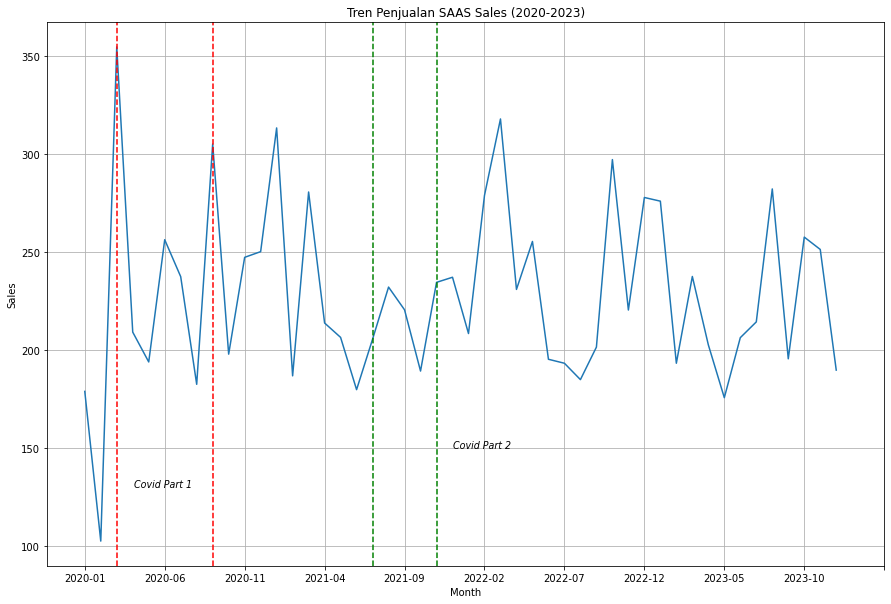

In [34]:
# Code for line plot
data = df_clean.groupby(['Month'])['Sales'].mean().reset_index()  # Menghitung rata-rata penjualan per bulan
plt.figure(figsize=(15, 10))
data['Month'] = data['Month'].astype(str)

# Line plot
sns.lineplot(data=data, x='Month', y='Sales')

# Menambahkan penanda untuk periode pandemi
plt.axvline(x=2, linestyle='--', color='red')  # Maret 2020
plt.axvline(x=8, linestyle='--', color='red')  # November 2020
plt.axvline(x=18, linestyle='--', color='green')  # Juni 2021
plt.axvline(x=22, linestyle='--', color='green')  # Desember 2021

# Menambahkan anotasi
plt.text(23.05, 150, 'Covid Part 2', fontsize=9.5, fontstyle='oblique')
plt.text(3.05, 130, 'Covid Part 1', fontsize=9.5, fontstyle='oblique')

# Konfigurasi plot
plt.title('Tren Penjualan SAAS Sales (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(0, 53, 5), rotation=0)  # Untuk menandai setiap 5 bulan
plt.grid(True)
plt.show()



### Melihat perbandingan total Sales pada Era Covid dan Era Non Covid

Rata-rata Sales selama era Covid: 230.5455513748192
Rata-rata Sales di luar era Covid: 229.6715353914103


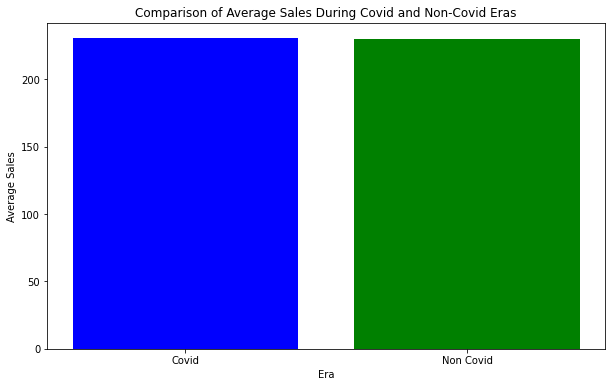

In [35]:
# Tentukan periode Covid Part 1 dan Part 2
covid_part1_start = '2020-03-01'
covid_part1_end = '2020-06-30'
covid_part2_start = '2021-06-01'
covid_part2_end = '2021-12-30'

# Hitung rata-rata Sales selama Covid Part 1 dan Part 2
covid_period_sales = df_clean[(df_clean['Order Date'] >= covid_part1_start) & (df_clean['Order Date'] <= covid_part1_end) | 
                          (df_clean['Order Date'] >= covid_part2_start) & (df_clean['Order Date'] <= covid_part2_end)]['Sales'].mean()

# Hitung rata-rata Sales di luar periode Covid
non_covid_sales = df_clean[(df_clean['Order Date'] < covid_part1_start) | 
                       (df_clean['Order Date'] > covid_part1_end) & (df_clean['Order Date'] < covid_part2_start) | 
                       (df_clean['Order Date'] > covid_part2_end)]['Sales'].mean()

# Tampilkan perbandingan
print(f"Rata-rata Sales selama era Covid: {covid_period_sales}")
print(f"Rata-rata Sales di luar era Covid: {non_covid_sales}")

# Buat DataFrame untuk visualisasi
data_visual = pd.DataFrame({
    'Era': ['Covid', 'Non Covid'],
    'Average Sales': [covid_period_sales, non_covid_sales]
})

# Plot visualisasi
plt.figure(figsize=(10, 6))
plt.bar(data_visual['Era'], data_visual['Average Sales'], color=['blue', 'green'])
plt.xlabel('Era')
plt.ylabel('Average Sales')
plt.title('Comparison of Average Sales During Covid and Non-Covid Eras')
plt.show()

Insight yang bisa diambil adalah:
1. **Lonjakan Awal Pandemi (Maret 2020)**: Terjadi `lonjakan signifikan` penjualan pada bulan Maret 2020 (354.72), menandakan `permintaan tinggi` untuk produk/layanan SAAS.
2. **Pemulihan Pasca-Penurunan (Juni - November 2020)**: Setelah `penurunan` pada April-Mei 2020, terjadi `peningkatan` penjualan hingga November 2020.
3. **Stabilitas Selama Gelombang Kedua (Juni - Desember 2021)**: Tidak ada `fluktuasi signifikan` dalam penjualan, menunjukkan kemampuan bisnis AWS mempertahankan `stabilitas` penjualan.
4. **Pemulihan Pasca-Pandemi (Mulai 2022)**: Tren penjualan menunjukkan `pemulihan` dan `stabilitas` hingga tahun 2023, menunjukkan `adaptasi` pasar dan keberhasilan bisnis dalam mengatasi tantangan.

Meskipun ada `fluktuasi`, rata-rata penjualan era Covid dan non-Covid tetap relatif sama, menunjukkan ketahanan bisnis AWS dalam lingkungan bisnis yang dinamis.

# Kesimpulan

1. **Kerugian dan Keuntungan Berdasarkan Segmen Pelanggan**:
*
    - `Kehilangan` pelanggan di segmen `Medium Value` menyebabkan `kerugian` finansial yang lebih `signifikan` ($107,225) dibandingkan dengan `kehilangan` di segmen `High Value` ($10,760). Oleh karena itu, menjaga pelanggan di segmen Medium Value menjadi `prioritas` untuk meminimalkan kerugian.
    - `Peningkatan` pelanggan dari segmen Low Value ke Medium Value menghasilkan `keuntungan` yang lebih besar ($88,800) dibandingkan peningkatan dari Medium Value ke High Value ($21,445). Fokus pada peningkatan segmen Low Value ke Medium Value lebih `menguntungkan` secara finansial.
2. **Tren Penjualan Selama Pandemi**:
    - Terjadi `lonjakan` penjualan yang `signifikan` pada awal pandemi (Maret 2020), menandakan permintaan tinggi untuk produk/layanan SAAS.
    - Mulai 2022, penjualan menunjukkan tren pemulihan dan `stabilitas` hingga tahun 2023, mencerminkan `adaptasi` pasar dan `keberhasilan` bisnis dalam mengatasi `tantangan` pandemi.
    - Rata-rata penjualan selama era Covid dan non-Covid tetap `relatif sama`, menunjukkan `ketahanan` bisnis AWS dalam lingkungan bisnis yang dinamis.

# Rekomendasi:

1. **Prioritaskan Pelanggan Segmen Medium Value**:
    - Fokuskan strategi retensi dan layanan pelanggan pada segmen Medium Value untuk `mengurangi` potensi `kerugian` yang signifikan.
    - Pertimbangkan program loyalitas atau insentif khusus untuk pelanggan segmen Medium Value guna `meningkatkan` retensi.

2. **Strategi Peningkatan Segmen Low Value ke Medium Value**:
    - Investasikan dalam upaya pemasaran dan penjualan yang bertujuan untuk mengubah pelanggan dari Low Value ke Medium Value, karena ini memberikan `keuntungan` finansial yang lebih besar.
    - Identifikasi faktor-faktor yang mendorong pelanggan Low Value untuk meningkatkan ke Medium Value dan tingkatkan aspek-aspek tersebut dalam penawaran produk/layanan.

3. **Adaptasi Pasca-Pandemi**:
    - Terus monitor tren penjualan dan adaptasi strategi bisnis untuk `mempertahankan` stabilitas dan pertumbuhan penjualan pasca-pandemi.
    - `Pertahankan` fleksibilitas dalam operasional bisnis untuk menghadapi perubahan permintaan pasar yang dinamis.


In [ ]:
merged_df = pd.merge(df_clean, rfm_df, on='Customer', how='inner')
merged_df.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Total,Month,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,523.920,2022-11,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,2195.820,2022-11,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
2,AMER-2020-118962,2020-08-05,20200805,Warren Forsyth,United States,New York City,AMER,NAMER,Chevron,1017,...,62.820,2020-08,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
3,AMER-2020-118962,2020-08-05,20200805,Warren Forsyth,United States,New York City,AMER,NAMER,Chevron,1017,...,221.920,2020-08,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
4,AMER-2020-118962,2020-08-05,20200805,Warren Forsyth,United States,New York City,AMER,NAMER,Chevron,1017,...,2381.008,2020-08,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers


In [ ]:
merged_df.to_csv("SaasSalesCleanedFix.csv", index=False)